# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

Pada kode ini, saya mengimpor library penting untuk analisis clustering. Saya menggunakan pandas dan numpy untuk pengolahan data, seaborn dan matplotlib untuk visualisasi, serta LabelEncoder dan StandardScaler untuk preprocessing data. Saya menerapkan KMeans untuk clustering dan menggunakan KElbowVisualizer untuk menentukan jumlah cluster optimal. Silhouette_score digunakan untuk mengevaluasi kualitas clustering, sementara PCA membantu dalam reduksi dimensi data.

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [146]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

Pada tahap ini, sebuah URL didefinisikan yang mengarah ke file CSV yang disimpan di Google Drive. Fungsi pd.read_csv() dari library pandas digunakan untuk membaca file CSV tersebut dan memuatnya ke dalam DataFrame df, sehingga data dapat diproses dan dianalisis lebih lanjut.

In [147]:
df.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


 Menggunakan df.head(5) untuk menampilkan 5 baris pertama dari DataFrame df. Fungsi ini berguna untuk melihat sekilas data yang telah dimuat, memungkinkan pengecekan awal terhadap struktur dan konten dataset sebelum melakukan analisis lebih lanjut

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

menggunakan df.info() untuk menampilkan informasi dasar tentang DataFrame df, seperti jumlah baris, jumlah kolom, tipe data masing-masing kolom, dan jumlah nilai non-null pada setiap kolom. Ini berguna untuk memahami struktur dataset secara keseluruhan dan mengecek apakah ada nilai yang hilang atau masalah lainnya pada data.

In [149]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


Kemudian menggunakan df.isnull().sum() untuk memeriksa apakah ada nilai yang hilang (missing values) dalam dataset. Fungsi ini akan memberikan jumlah nilai yang hilang di setiap kolom. Hal ini penting untuk mengetahui apakah ada kolom yang perlu diimputasi atau dihapus sebelum melanjutkan ke tahap berikutnya, seperti pemodelan atau analisis lebih lanjut.

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

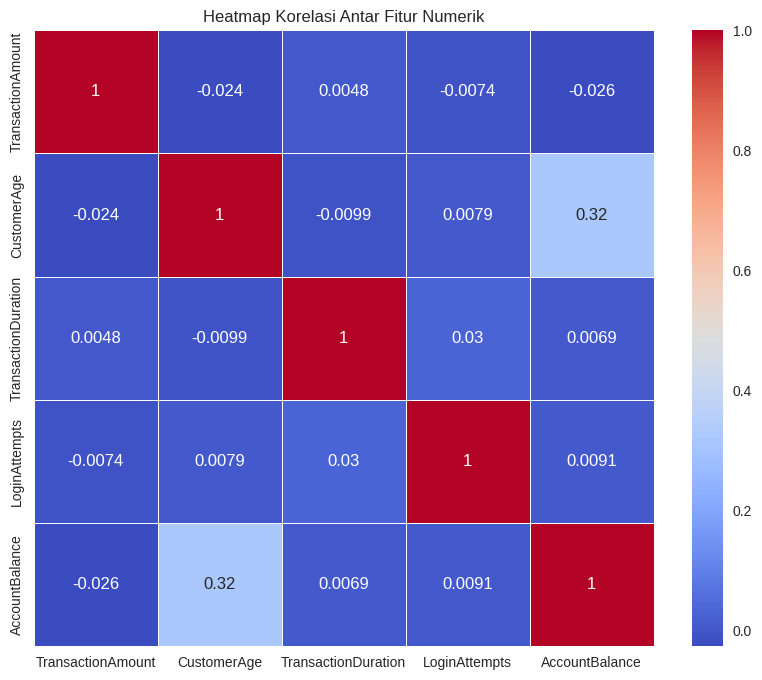

In [150]:
df_numeric = df.select_dtypes(include=np.number).copy()
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

Pada langkah ini, dilakukan visualisasi heatmap korelasi antar fitur numerik menggunakan seaborn. Pertama, dataset yang hanya berisi fitur numerik dipilih dengan df.select_dtypes(), kemudian dihitung matriks korelasi antar fitur menggunakan df_numeric.corr(). Hasil korelasi ini kemudian divisualisasikan dalam bentuk heatmap, dengan warna yang mewakili kekuatan hubungan antara fitur. Nilai korelasi mendekati 1 menunjukkan hubungan positif yang kuat, sementara nilai mendekati -1 menunjukkan hubungan negatif yang kuat. Visualisasi ini membantu dalam mengidentifikasi hubungan antar fitur yang dapat mempengaruhi model analisis atau pemodelan lebih lanjut.

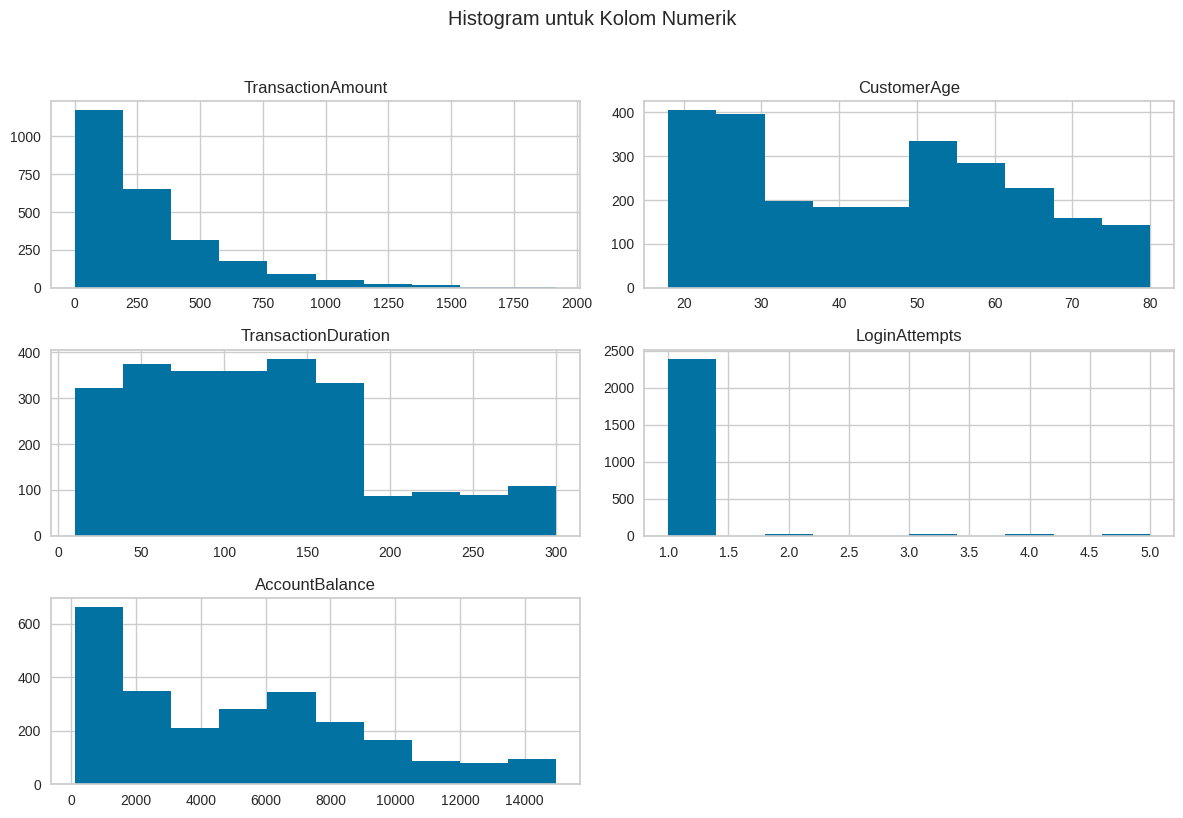

In [151]:
df_numeric.hist(figsize=(12, 8))
plt.suptitle('Histogram untuk Kolom Numerik', y=1.02)
plt.tight_layout()
plt.show()

Pada langkah ini, dilakukan visualisasi histogram untuk melihat distribusi data pada setiap fitur numerik di dataset. Setiap kolom fitur seperti TransactionAmount, CustomerAge, TransactionDuration, LoginAttempts, dan AccountBalance digambarkan dengan histogram yang menunjukkan frekuensi nilai pada setiap rentang. Grafik ini memberikan gambaran mengenai distribusi nilai, apakah cenderung terpusat, terdistribusi merata, atau memiliki outlier, sehingga membantu dalam memahami karakteristik data sebelum langkah analisis atau pemodelan lebih lanjut.










(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

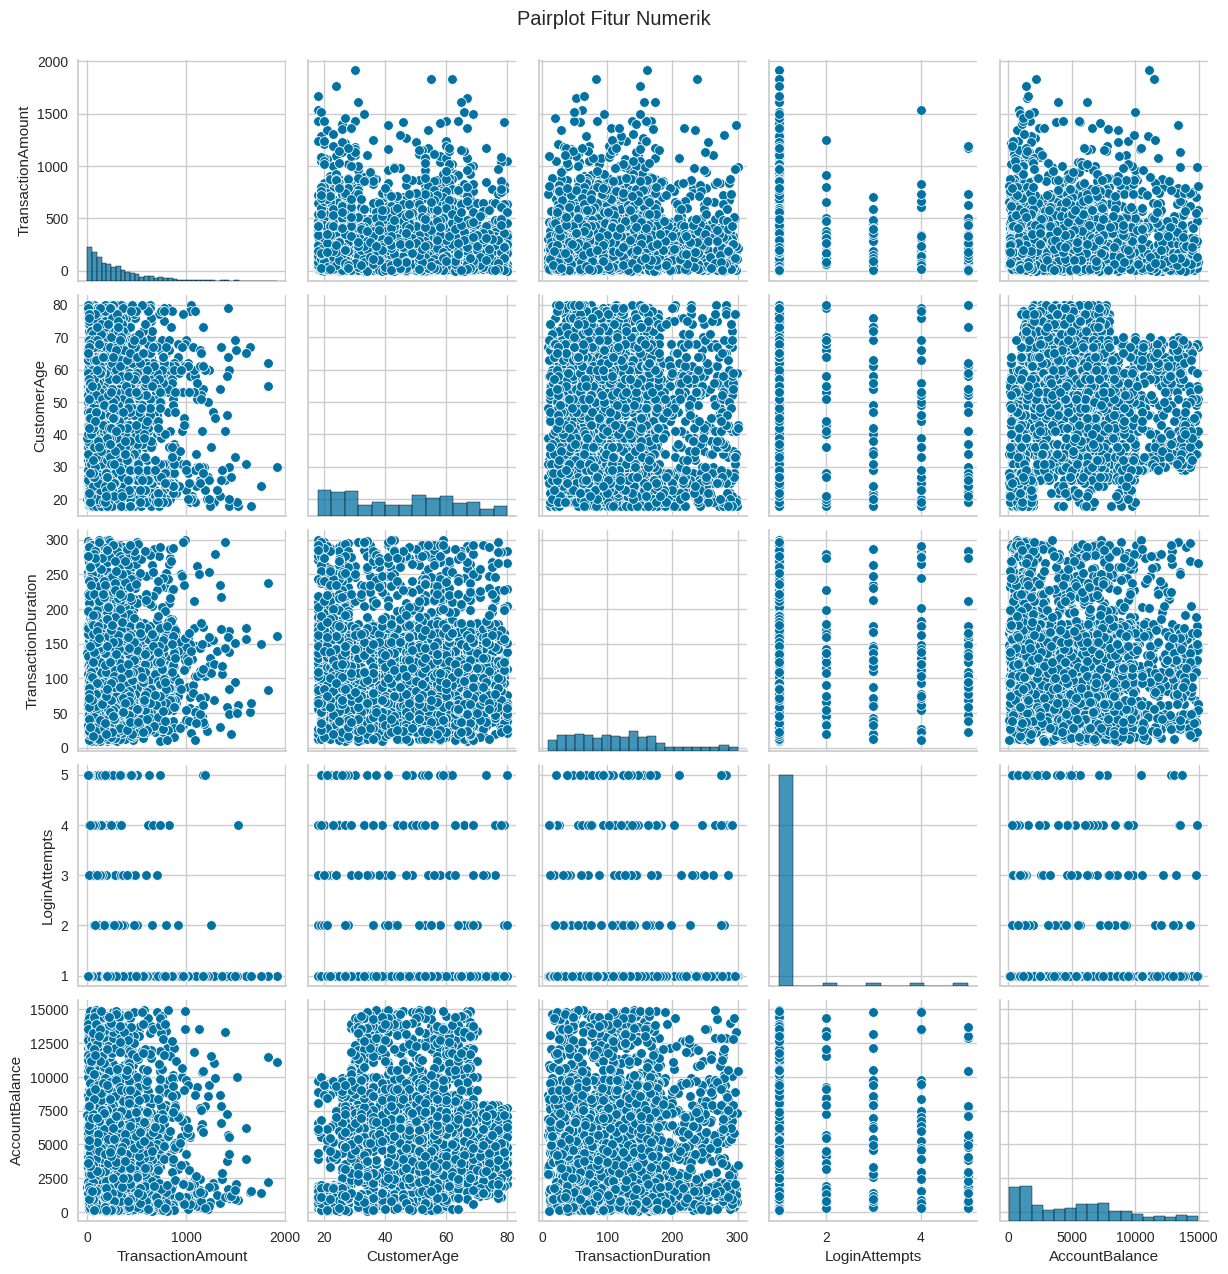

In [152]:
sns.pairplot(df_numeric)
plt.suptitle('Pairplot Fitur Numerik', y=1.02)
plt.show()

Pada langkah ini, digunakan fungsi sns.pairplot(df_numeric) untuk membuat visualisasi pairplot dari semua fitur numerik dalam dataset. Pairplot ini menghasilkan grafik scatter plot yang menunjukkan hubungan antar fitur secara pasangan, serta histogram untuk masing-masing fitur di diagonal utama. Ini memungkinkan untuk menganalisis distribusi dan korelasi antar fitur secara visual. plt.suptitle() digunakan untuk menambahkan judul pada plot dengan sedikit penyesuaian pada posisi judul. Visualisasi ini membantu dalam mengidentifikasi pola hubungan antar fitur dan potensi outlier atau distribusi data yang tidak normal.

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [153]:
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


Pada hasil dari df.isnull().sum(), terlihat bahwa beberapa kolom dalam dataset memiliki nilai yang hilang (missing values). Kolom seperti TransactionID, Location, DeviceID, dan AccountBalance memiliki 30 nilai yang hilang, sementara kolom lainnya seperti TransactionAmount dan TransactionDate memiliki 26 dan 28 nilai yang hilang. Kolom CustomerAge dan CustomerOccupation memiliki sedikit nilai yang hilang, yaitu 18 dan 23, yang masih dapat ditangani dengan imputasi atau penghapusan baris. Menangani nilai yang hilang ini penting untuk memastikan kualitas dan kelengkapan dataset sebelum digunakan dalam model machine learning.

In [154]:
df.duplicated().sum()

np.int64(21)

Kode ini digunakan untuk memeriksa keberadaan data duplikat dalam DataFrame.

In [155]:
df.drop(['TransactionID', 'AccountID', 'MerchantID', 'DeviceID', 'IP Address', 'TransactionDate', 'Location', 'PreviousTransactionDate'], axis=1, inplace=True)

Langkah ini adalah pembersihan data yang bertujuan untuk menghapus kolom-kolom yang tidak relevan seperti ID transaksi, ID akun, ID merchant, ID perangkat, alamat IP, tanggal transaksi, lokasi, dan tanggal transaksi sebelumnya, agar data fokus pada fitur yang penting untuk clustering.

In [156]:
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

 digunakan untuk mendapatkan daftar nama kolom yang tersisa dalam DataFrame df setelah operasi pembersihan atau pemilihan fitur sebelumnya. Ini berfungsi sebagai verifikasi untuk memastikan kolom-kolom yang tidak diperlukan telah dihapus dan hanya fitur-fitur yang akan digunakan untuk normalisasi dan clustering yang tersisa, seperti TransactionAmount, CustomerAge, dan lainnya.

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [157]:
df.dropna(inplace=True)

digunakan untuk menghapus semua baris yang mengandung nilai-nilai yang hilang (NaN) dari DataFrame df. Ini adalah bagian dari pembersihan data yang penting untuk memastikan kualitas data, karena nilai yang hilang dapat menyebabkan masalah atau error saat melakukan normalisasi atau melatih model machine learning.

In [158]:
df.drop_duplicates(inplace=True)

 digunakan untuk menghapus baris-baris yang sepenuhnya duplikat dari DataFrame df. Ini adalah bagian dari pembersihan data yang esensial untuk memastikan setiap observasi unik dan mencegah bias atau kelebihan bobot pada pola yang berulang dalam data, sehingga hasil analisis dan model lebih akurat.

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2318 entries, 0 to 2523
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2318 non-null   float64
 1   TransactionType      2318 non-null   object 
 2   Channel              2318 non-null   object 
 3   CustomerAge          2318 non-null   float64
 4   CustomerOccupation   2318 non-null   object 
 5   TransactionDuration  2318 non-null   float64
 6   LoginAttempts        2318 non-null   float64
 7   AccountBalance       2318 non-null   float64
dtypes: float64(5), object(3)
memory usage: 163.0+ KB


Digunakan untuk menampilkan ringkasan informasi DataFrame df, termasuk jumlah entri (baris), jumlah kolom, tipe data masing-masing kolom (float64, object), jumlah nilai non-null per kolom, serta penggunaan memori. Ini adalah langkah verifikasi kualitas data yang krusial untuk memastikan bahwa data telah bersih dari nilai yang hilang dan siap untuk proses selanjutnya seperti normalisasi atau encoding.


--- Menangani Outlier (IQR) pada Kolom: TransactionAmount ---
Jumlah outlier (IQR): 104 (4.49%)


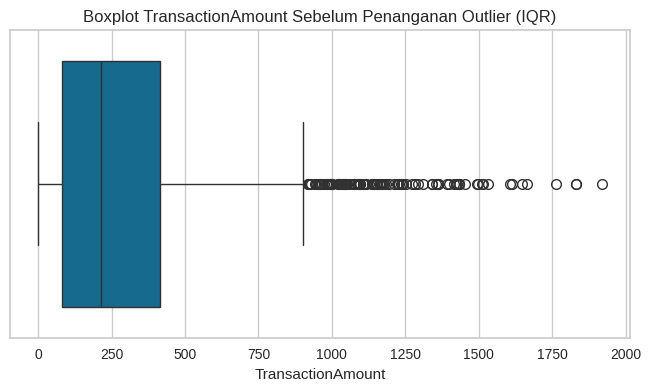

Jumlah outlier di bawah ambang batas 5.00%. Memilih metode drop.
Baris yang mengandung outlier (IQR) pada kolom 'TransactionAmount' telah dihapus.


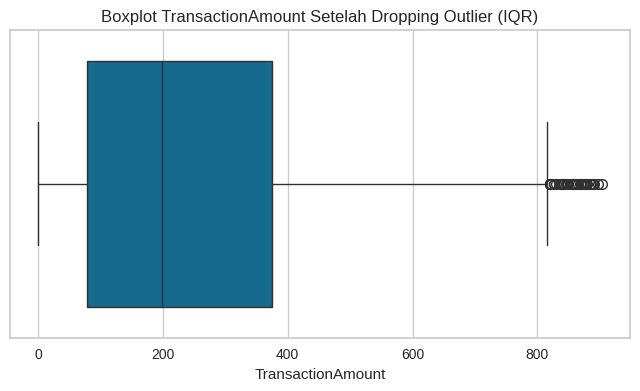


--- Menangani Outlier (IQR) pada Kolom: CustomerAge ---
Jumlah outlier (IQR): 0 (0.00%)


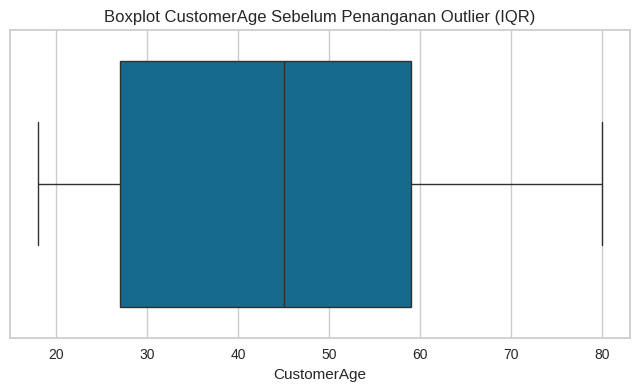

Jumlah outlier di bawah ambang batas 5.00%. Memilih metode drop.
Baris yang mengandung outlier (IQR) pada kolom 'CustomerAge' telah dihapus.


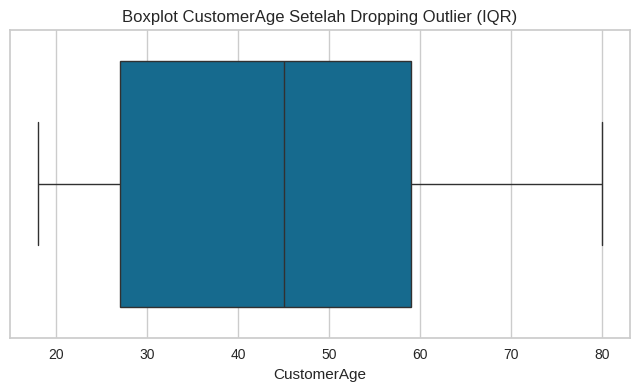


--- Menangani Outlier (IQR) pada Kolom: TransactionDuration ---
Jumlah outlier (IQR): 0 (0.00%)


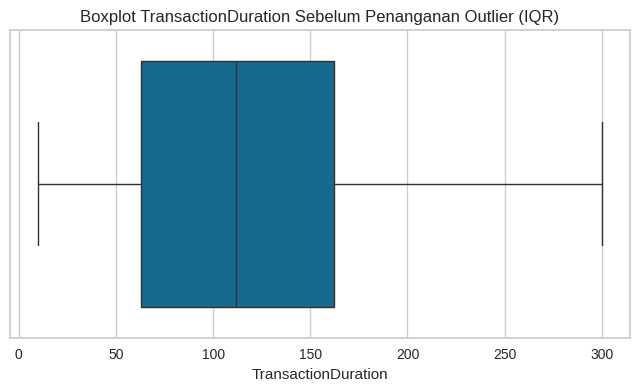

Jumlah outlier di bawah ambang batas 5.00%. Memilih metode drop.
Baris yang mengandung outlier (IQR) pada kolom 'TransactionDuration' telah dihapus.


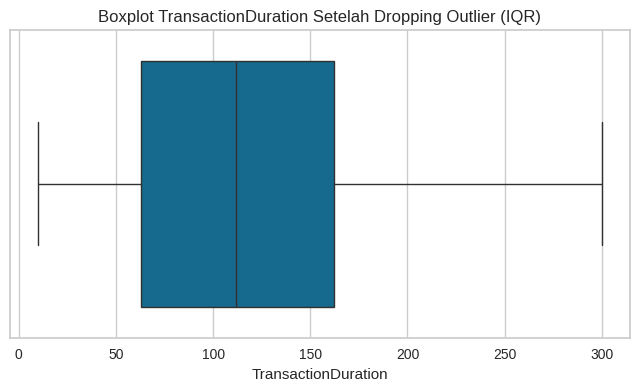


--- Menangani Outlier (IQR) pada Kolom: LoginAttempts ---
Jumlah outlier (IQR): 109 (4.70%)


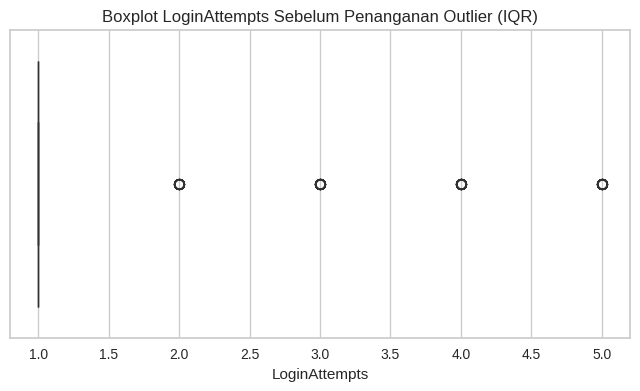

Jumlah outlier di bawah ambang batas 5.00%. Memilih metode drop.
Baris yang mengandung outlier (IQR) pada kolom 'LoginAttempts' telah dihapus.


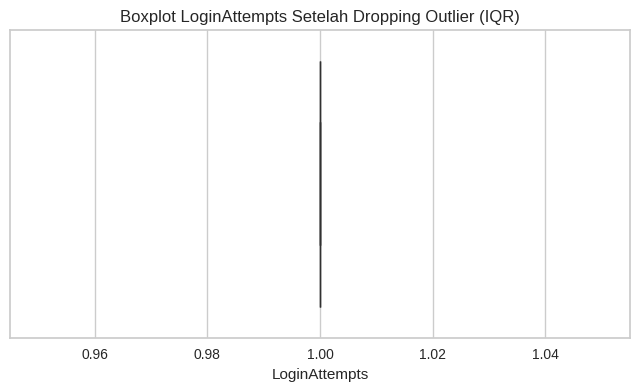


--- Menangani Outlier (IQR) pada Kolom: AccountBalance ---
Jumlah outlier (IQR): 0 (0.00%)


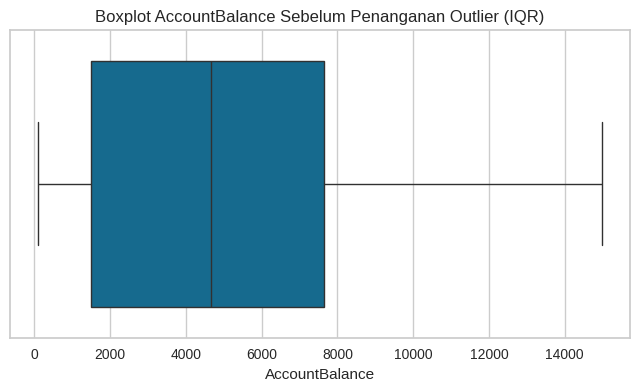

Jumlah outlier di bawah ambang batas 5.00%. Memilih metode drop.
Baris yang mengandung outlier (IQR) pada kolom 'AccountBalance' telah dihapus.


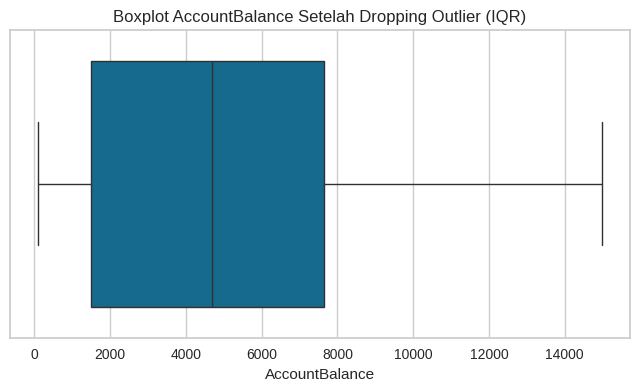


--- DataFrame Setelah Penanganan Outlier (Imputasi, IQR) ---
   TransactionAmount TransactionType Channel  CustomerAge CustomerOccupation  \
0              14.09           Debit     ATM         70.0             Doctor   
1             376.24           Debit     ATM         68.0             Doctor   
2             126.29           Debit  Online         19.0            Student   
3             184.50           Debit  Online         26.0            Student   
5              92.15           Debit     ATM         18.0            Student   

   TransactionDuration  LoginAttempts  AccountBalance  
0                 81.0            1.0         5112.21  
1                141.0            1.0        13758.91  
2                 56.0            1.0         1122.35  
3                 25.0            1.0         8569.06  
5                172.0            1.0          781.68  
Ukuran DataFrame setelah imputasi (IQR): (2318, 8)

--- DataFrame Setelah Penanganan Outlier (Dropping, IQR) ---
   Trans

In [160]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

numerical_cols = df_numeric.columns

outlier_threshold = 0.05

df_cleaned_iqr = df.copy()
df_imputed_iqr = df.copy()

for col in numerical_cols:
    print(f"\n--- Menangani Outlier (IQR) pada Kolom: {col} ---")

    outliers_iqr, lower_bound, upper_bound = detect_outliers_iqr(df, col)
    num_outliers_iqr = len(outliers_iqr)
    percentage_outliers_iqr = num_outliers_iqr / len(df)

    print(f"Jumlah outlier (IQR): {num_outliers_iqr} ({percentage_outliers_iqr:.2%})")

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col} Sebelum Penanganan Outlier (IQR)')
    plt.show()

    if percentage_outliers_iqr > outlier_threshold:
        print(f"Jumlah outlier melebihi ambang batas {outlier_threshold:.2%}. Memilih metode imputasi (median).")
        median_val = df[col].median()
        df_imputed_iqr[col] = np.where((df_imputed_iqr[col] < lower_bound) | (df_imputed_iqr[col] > upper_bound),
                                       median_val,
                                       df_imputed_iqr[col])
        print(f"Nilai outlier pada kolom '{col}' diimputasi dengan median: {median_val}")

        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df_imputed_iqr[col])
        plt.title(f'Boxplot {col} Setelah Imputasi (Median, IQR)')
        plt.show()

    else:
        print(f"Jumlah outlier di bawah ambang batas {outlier_threshold:.2%}. Memilih metode drop.")
        df_cleaned_iqr = df_cleaned_iqr[(df_cleaned_iqr[col] >= lower_bound) & (df_cleaned_iqr[col] <= upper_bound)]
        print(f"Baris yang mengandung outlier (IQR) pada kolom '{col}' telah dihapus.")

        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df_cleaned_iqr[col])
        plt.title(f'Boxplot {col} Setelah Dropping Outlier (IQR)')
        plt.show()

print("\n--- DataFrame Setelah Penanganan Outlier (Imputasi, IQR) ---")
print(df_imputed_iqr.head())
print(f"Ukuran DataFrame setelah imputasi (IQR): {df_imputed_iqr.shape}")

print("\n--- DataFrame Setelah Penanganan Outlier (Dropping, IQR) ---")
print(df_cleaned_iqr.head())
print(f"Ukuran DataFrame setelah dropping (IQR): {df_cleaned_iqr.shape}")

Langkah bertujuan untuk menangani outlier (pencilan) pada kolom numerik menggunakan metode Interquartile Range (IQR). Kode ini pertama mendeteksi outlier. Kemudian, berdasarkan persentase outlier yang ditemukan dibandingkan ambang batas (outlier_threshold), ia akan memilih strategi penanganan: jika outlier banyak, ia akan mengganti nilai outlier dengan median (imputasi); jika sedikit, ia akan menghapus baris yang mengandung outlier (dropping). Proses ini penting untuk memastikan kualitas data dan mencegah outlier membiaskan analisis atau model machine learning.

In [161]:
df['TransactionAmount'] = df['TransactionAmount'].apply(lambda x: max(0, x))

bins_quantiles = df['TransactionAmount'].quantile([0.2, 0.4, 0.6, 0.8]).tolist()

max_amount = df['TransactionAmount'].max()
bins = [-np.inf] + bins_quantiles + [max_amount + 0.01]

labels = ['Sangat Kecil', 'Kecil', 'Sedang', 'Besar', 'Sangat Besar']

df['TransactionAmount'] = pd.cut(df['TransactionAmount'], bins=bins, labels=labels, include_lowest=True).astype(str)

print("\nDataframe setelah encoding hasil binning:")
print(df[['TransactionAmount']].head())


Dataframe setelah encoding hasil binning:
  TransactionAmount
0      Sangat Kecil
1             Besar
2             Kecil
3            Sedang
5             Kecil


Langkah ini melakukan binning dan encoding pada kolom TransactionAmount. Pertama, nilai negatif diubah menjadi nol. Kemudian, TransactionAmount dikategorikan menjadi 5 kelompok (Sangat Kecil hingga Sangat Besar) berdasarkan kuantil (20%, 40%, 60%, 80%) dari distribusinya. Proses ini mengubah fitur numerik menjadi kategorikal, yang dapat membantu dalam analisis atau modeling tertentu dengan menyederhanakan representasi nilai transaksi.

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2318 entries, 0 to 2523
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2318 non-null   object 
 1   TransactionType      2318 non-null   object 
 2   Channel              2318 non-null   object 
 3   CustomerAge          2318 non-null   float64
 4   CustomerOccupation   2318 non-null   object 
 5   TransactionDuration  2318 non-null   float64
 6   LoginAttempts        2318 non-null   float64
 7   AccountBalance       2318 non-null   float64
dtypes: float64(4), object(4)
memory usage: 163.0+ KB


Langkah df.info() pada titik ini digunakan untuk memverifikasi struktur DataFrame df setelah semua pra-pemrosesan sebelumnya, khususnya setelah kolom TransactionAmount di-binning dan diubah menjadi tipe data object (kategorikal). Ini mengonfirmasi jumlah entri non-null dan tipe data setiap kolom, memastikan kesiapan data untuk langkah-langkah machine learning selanjutnya.

In [163]:
df_categorical = df.select_dtypes(include='object').copy()
df_numerical = df.select_dtypes(exclude='object').copy()

Langkah ini memisahkan DataFrame df menjadi dua bagian terpisah: df_categorical yang hanya berisi kolom dengan tipe data object (kategorikal) dan df_numerical yang hanya berisi kolom dengan tipe data non-object (numerik). Pemisahan ini penting karena fitur kategorikal dan numerik memerlukan penanganan pra-pemrosesan yang berbeda (misalnya, encoding untuk kategorikal, penskalaan untuk numerik) sebelum dapat digunakan untuk clustering atau modeling.

In [164]:
df_categorical.columns

Index(['TransactionAmount', 'TransactionType', 'Channel',
       'CustomerOccupation'],
      dtype='object')

Langkah ini digunakan untuk memeriksa dan menampilkan nama-nama kolom kategorikal yang berhasil dipisahkan sebelumnya. Ini penting sebagai verifikasi untuk memastikan bahwa pemisahan fitur numerik dan kategorikal telah akurat dan hanya kolom-kolom yang seharusnya berjenis object yang masuk ke dalam df_categorical, sebelum proses encoding lebih lanjut.

In [165]:
TransactionTypeEncoder = LabelEncoder()
df_categorical['TransactionType'] = TransactionTypeEncoder.fit_transform(df_categorical['TransactionType'])
TransactionAmountEncoder = LabelEncoder()
df_categorical['TransactionAmount'] = TransactionAmountEncoder.fit_transform(df_categorical['TransactionAmount'])
ChannelEncoder = LabelEncoder()
df_categorical['Channel'] = ChannelEncoder.fit_transform(df_categorical['Channel'])
CustomerOccupationEncoder = LabelEncoder()
df_categorical['CustomerOccupation'] = CustomerOccupationEncoder.fit_transform(df_categorical['CustomerOccupation'])

print("DataFrame setelah Label Encoding:")
df_categorical.head(5)

DataFrame setelah Label Encoding:


,TransactionAmount,TransactionType,Channel,CustomerOccupation
0,3,1,0,0
1,0,1,0,0
2,1,1,2,3
3,4,1,2,3
5,1,1,0,3


Langkah ini menggunakan LabelEncoder() untuk mengubah fitur kategorikal (TransactionType, TransactionAmount, Channel, CustomerOccupation) menjadi representasi numerik. Setiap nilai unik dalam kolom tersebut akan diberi angka integer unik (misalnya, 'Debit' menjadi 0, 'Credit' menjadi 1), yang diperlukan agar algoritma machine learning dapat memproses data tersebut, karena sebagian besar algoritma hanya bekerja dengan input numerik.

In [166]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numerical)

df_scaled_standard = pd.DataFrame(scaled_data, columns=df_numerical.columns, index=df_numerical.index)

df = pd.concat([df_categorical, df_scaled_standard], axis=1)
df.head()

,TransactionAmount,TransactionType,Channel,CustomerOccupation,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,3,1,0,0,1.426907,-0.548294,-0.203044,0.008590
1,0,1,0,0,1.314777,0.301410,-0.203044,2.227060
2,1,1,2,3,-1.432422,-0.902337,-0.203044,-1.015082
3,4,1,2,3,-1.039965,-1.341351,-0.203044,0.895508
5,1,1,0,3,-1.488487,0.740424,-0.203044,-1.102487


Langkah ini melakukan standardisasi fitur numerik menggunakan StandardScaler() agar memiliki rata-rata nol dan standar deviasi satu, lalu menggabungkan kembali data numerik yang sudah distandardisasi dengan data kategorikal yang sudah di-encode. Tujuan utamanya adalah menyiapkan seluruh dataset dalam format numerik dan skala yang seragam untuk siap dimasukkan ke dalam algoritma clustering atau model machine learning lainnya.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

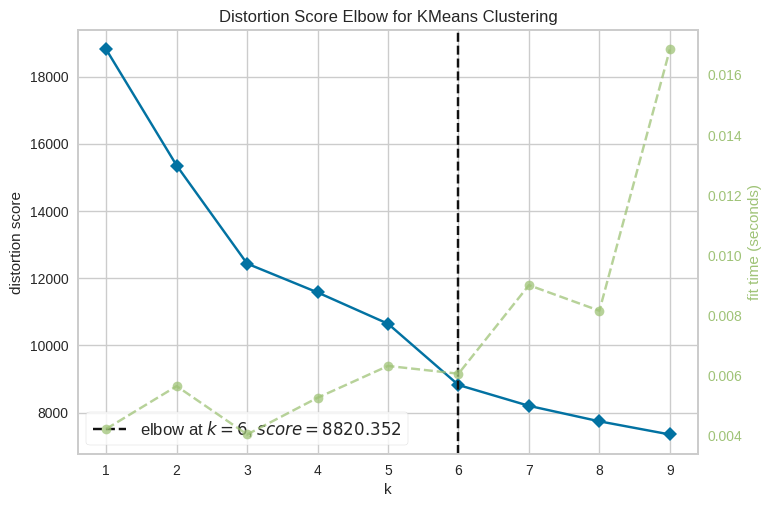

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [167]:
model_kmeans = KMeans(random_state=42)

penentu_jumlah_klaster = KElbowVisualizer(model_kmeans, k=(1, 10))

penentu_jumlah_klaster.fit(df)

penentu_jumlah_klaster.show()

Langkah ini menggunakan metode Elbow untuk menentukan jumlah cluster (k) terbaik untuk algoritma K-Means. Objek KMeans diinisialisasi, kemudian KElbowVisualizer memvisualisasikan "distortion score" untuk rentang nilai k. Titik "siku" pada grafik ini menunjukkan nilai k optimal di mana penambahan cluster tidak lagi memberikan penurunan distorsi yang signifikan, membantu menentukan jumlah cluster yang paling efisien.

In [168]:
n_clusters_optimal = 6
kmeans_model = KMeans(n_clusters=n_clusters_optimal, random_state=42, n_init=10)
kmeans_model.fit(df)
cluster_labels = kmeans_model.labels_

Langkah ini membangun dan melatih model K-Means Clustering. Berdasarkan analisis Elbow Method sebelumnya, n_clusters_optimal (dalam contoh ini 6) ditetapkan sebagai jumlah cluster yang akan dibentuk. Model K-Means kemudian dilatih pada data df yang telah diproses, dan hasilnya adalah label cluster (kmeans_model.labels_) yang menunjukkan cluster mana setiap baris data menjadi anggotanya.

Jalankan cell code ini untuk menyimpan model kamu.

In [169]:
import joblib
joblib.dump(kmeans_model, "model_clustering.h5")

['model_clustering.h5']

Langkah ini menyimpan model clustering K-Means yang telah dilatih ke dalam sebuah file berekstensi .h5 (atau .joblib jika tidak spesifik). Dengan menggunakan joblib.dump(), model (kmeans_model) dapat disimpan dan dimuat kembali di kemudian hari tanpa perlu melatihnya dari awal, yang berguna untuk penggunaan ulang atau deployment model.

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [170]:
silhouette_avg = silhouette_score(df, cluster_labels)
print(f"Nilai Silhouette Score: {silhouette_avg}")

Nilai Silhouette Score: 0.2009998353173333


Langkah ini mengevaluasi kualitas hasil clustering menggunakan Silhouette Score. Skor ini mengukur seberapa mirip suatu objek dengan cluster-nya sendiri dibandingkan dengan cluster lain, dengan nilai berkisar antara -1 (buruk) hingga +1 (baik). Nilai 0.2009998353173333 menunjukkan bahwa batas antara cluster tidak terlalu jelas, dan mungkin ada tumpang tindih atau cluster tidak terbentuk dengan sangat padat dan terpisah.

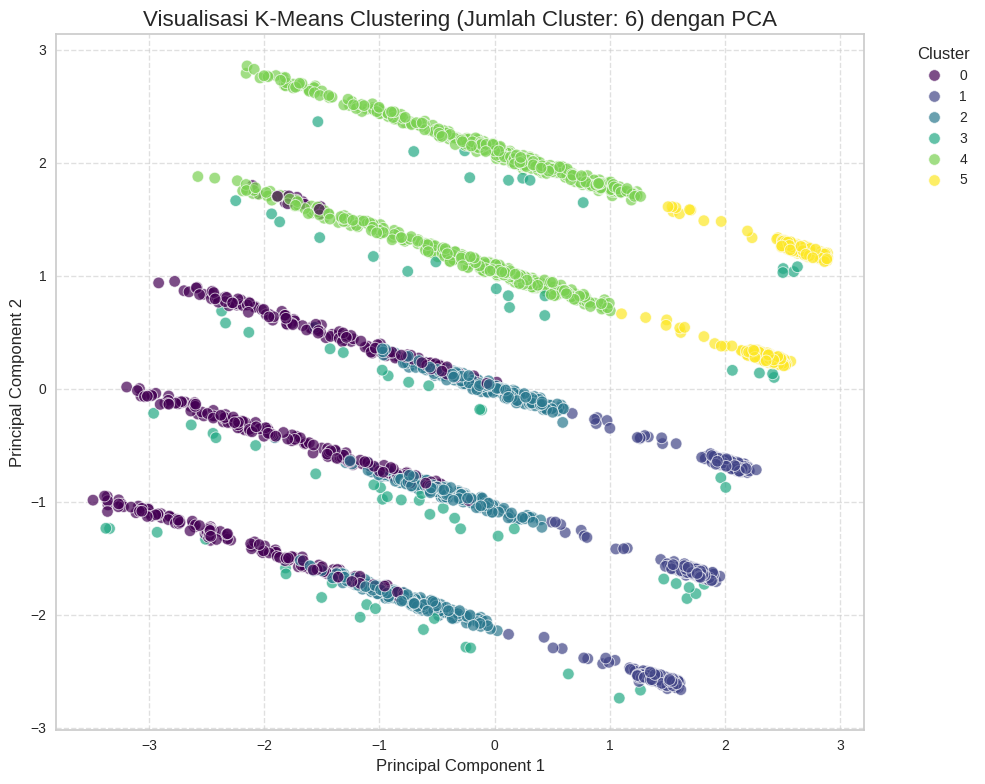

In [171]:
pca = PCA(n_components=2, random_state=42)
principal_components = pca.fit_transform(df)

df_pca = pd.DataFrame(data = principal_components,
                      columns = ['Principal Component 1', 'Principal Component 2'],
                      index=df.index)
df_pca['Cluster'] = cluster_labels

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2',
                hue='Cluster',
                palette='viridis',
                data=df_pca,
                s=70,
                alpha=0.7,
                edgecolor='w'
               )

plt.title(f'Visualisasi K-Means Clustering (Jumlah Cluster: {n_clusters_optimal}) dengan PCA', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Langkah ini melakukan reduksi dimensi menggunakan PCA (Principal Component Analysis) untuk memvisualisasikan hasil clustering. Data diubah menjadi dua komponen utama (Principal Component 1 dan Principal Component 2) yang menangkap variabilitas terbesar. Kemudian, hasil PCA ini di-plot dalam scatterplot, di mana setiap titik diwarnai berdasarkan cluster tempatnya berada, sehingga memudahkan untuk melihat pemisahan visual antar cluster yang telah dibentuk oleh K-Means.

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [172]:
pca = PCA(n_components=5, random_state=42)

df_pca = pca.fit_transform(df)

df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])], index=df.index)

print("DataFrame setelah PCA (5 komponen pertama):")
print(df_pca.head())
print("\nBentuk DataFrame setelah PCA:", df_pca.shape)

DataFrame setelah PCA (5 komponen pertama):
        PC1       PC2       PC3       PC4       PC5
0 -1.252260  1.494075 -0.609313  0.259043  0.881042
1 -3.361265 -0.953572 -0.024140 -0.472392  0.095222
2  1.803900 -1.670273 -0.726430  0.471976 -0.691311
3  1.548171  1.568023 -0.982741  0.826057 -0.933213
5  1.887419 -1.631400  0.444665 -0.687969 -0.490604

Bentuk DataFrame setelah PCA: (2318, 5)


Langkah ini menerapkan Analisis Komponen Utama (PCA) untuk mereduksi dimensi dataset dari jumlah fitur aslinya menjadi 5 komponen utama (n_components=5). Tujuannya adalah menyederhanakan data dengan menangkap variabilitas paling penting ke dalam jumlah fitur yang lebih sedikit (PC1 hingga PC5), yang dapat mengurangi kompleksitas komputasi dan potensi noise saat membangun model clustering atau model machine learning lainnya.

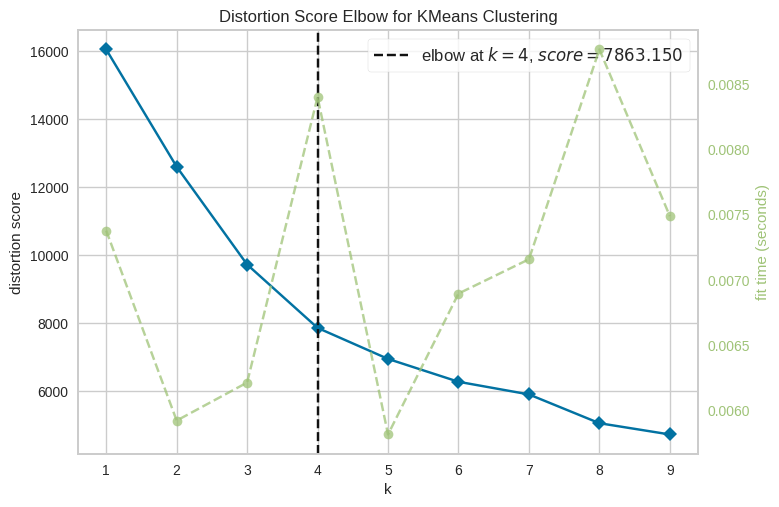

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [173]:
model_kmeans_pca = KMeans(random_state=42)

penentu_jumlah_klaster = KElbowVisualizer(model_kmeans_pca, k=(1, 10))

penentu_jumlah_klaster.fit(df_pca)

penentu_jumlah_klaster.show()

Langkah ini kembali menggunakan metode Elbow dengan KElbowVisualizer untuk menentukan jumlah cluster terbaik (k), namun kali ini diterapkan pada data yang sudah direduksi dimensinya oleh PCA (df_pca). Proses ini penting untuk memastikan bahwa penentuan k optimal memperhitungkan representasi data yang lebih ringkas dan mungkin lebih bersih dari noise setelah PCA, yang berpotensi menghasilkan cluster yang lebih baik atau lebih efisien.

In [174]:
n_clusters_optimal = 4

kmeans_model_pca = KMeans(n_clusters=n_clusters_optimal, random_state=42, n_init=10)

kmeans_model_pca.fit(df_pca)

cluster_labels_pca = kmeans_model_pca.labels_

Langkah ini membangun dan melatih kembali model K-Means Clustering, namun kali ini menggunakan data yang telah direduksi dimensinya dengan PCA (df_pca). Berdasarkan hasil Elbow Method pada data PCA, n_clusters_optimal (dalam contoh ini 4) ditetapkan. Model K-Means kemudian dilatih, dan hasil akhirnya adalah label cluster (cluster_labels_pca) untuk setiap titik data dalam ruang dimensi yang lebih rendah setelah PCA.

In [175]:
joblib.dump(kmeans_model_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

Langkah ini menyimpan model K-Means clustering yang telah dilatih menggunakan data yang direduksi oleh PCA (kmeans_model_pca) ke dalam sebuah file bernama "PCA_model_clustering.h5". Ini memungkinkan model disimpan dan dimuat kembali di kemudian hari untuk penggunaan atau deployment, sekaligus membedakannya dari model clustering yang dilatih tanpa PCA.

In [176]:
silhouette_avg_pca = silhouette_score(df_pca, cluster_labels_pca)
print(f"Nilai Silhouette Score: {silhouette_avg_pca}")

Nilai Silhouette Score: 0.2957563711146963


Langkah ini mengevaluasi kualitas model clustering yang dilatih pada data hasil PCA menggunakan Silhouette Score. Skor 0.2957563711146963 menunjukkan peningkatan kualitas cluster dibandingkan sebelumnya (0.2009998353173333). Ini mengindikasikan bahwa dengan mereduksi dimensi menggunakan PCA, cluster yang terbentuk menjadi lebih padat dan terpisah, menghasilkan batas cluster yang lebih jelas.

# **5. Interpretasi Cluster**

In [177]:
df['Target'] = kmeans_model.labels_
df

,TransactionAmount,TransactionType,Channel,CustomerOccupation,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Target
0,3,1,0,0,1.426907,-0.548294,-0.203044,0.008590,4
1,0,1,0,0,1.314777,0.301410,-0.203044,2.227060,0
2,1,1,2,3,-1.432422,-0.902337,-0.203044,-1.015082,1
3,4,1,2,3,-1.039965,-1.341351,-0.203044,0.895508,5
5,1,1,0,3,-1.488487,0.740424,-0.203044,-1.102487,1
...,...,...,...,...,...,...,...,...,...
2508,4,1,1,0,0.193471,0.811233,-0.203044,-1.237681,4
2509,3,1,1,2,0.641993,0.372219,-0.203044,-0.435094,4
2510,4,1,2,3,-1.208161,-1.426321,-0.203044,-0.847143,5
2511,4,0,2,3,-1.152096,-0.378353,-0.203044,-1.269367,5


Langkah ini menambahkan hasil cluster (label cluster) dari model K-Means (kmeans_model.labels_) sebagai kolom baru bernama Target ke dalam DataFrame utama df. Ini penting untuk mengintegrasikan informasi cluster ke dalam data asli, mempermudah analisis dan interpretasi karakteristik setiap kelompok yang telah terbentuk.

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [178]:
df.columns

Index(['TransactionAmount', 'TransactionType', 'Channel', 'CustomerOccupation',
       'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance',
       'Target'],
      dtype='object')

In [179]:
categorical_cols = []
numerical_cols = ['TransactionAmount', 'TransactionType', 'Channel', 'CustomerOccupation',
       'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance',
       'Target']

cluster_counts = df['Target'].value_counts()

# categorical_modes = df.groupby('Cluster')[categorical_cols].agg(lambda x: x.mode()[0])

numerical_means = df.groupby('Target')[numerical_cols].min()
numerical_mins = df.groupby('Target')[numerical_cols].mean()
numerical_maxs = df.groupby('Target')[numerical_cols].max()

cluster_summary = pd.concat([
    cluster_counts,
    # categorical_modes,
    numerical_means.add_suffix('_mean'),
    numerical_mins.add_suffix('_min'),
    numerical_maxs.add_suffix('_max')
], axis=1)
cluster_summary

,count,TransactionAmount_mean,TransactionType_mean,Channel_mean,CustomerOccupation_mean,CustomerAge_mean,TransactionDuration_mean,LoginAttempts_mean,AccountBalance_mean,Target_mean,...,Target_min,TransactionAmount_max,TransactionType_max,Channel_max,CustomerOccupation_max,CustomerAge_max,TransactionDuration_max,LoginAttempts_max,AccountBalance_max,Target_max
Target,,,,,,,,,,,,,,,,,,,,,
4,648,3,0,0,0,-1.039965,-1.553777,-0.203044,-1.274111,4,...,4.0,4,1,2,2,1.987560,2.553126,1.514678,2.498242,4
2,544,0,0,0,0,-1.039965,-1.553777,-0.203044,-1.268159,2,...,2.0,2,1,2,2,1.987560,2.553126,1.514678,0.748659,2
0,445,0,0,0,0,-1.039965,-1.553777,-0.203044,-0.114981,0,...,0.0,3,1,2,1,1.426907,2.510641,1.514678,2.539837,0
1,359,0,0,0,1,-1.488487,-1.539615,-0.203044,-1.276820,1,...,1.0,2,1,2,3,-0.927834,2.538964,1.514678,1.253249,1
5,238,3,0,0,3,-1.488487,-1.525453,-0.203044,-1.277064,5,...,5.0,4,1,2,3,-0.927834,2.510641,1.514678,1.189951,5
3,84,0,0,0,0,-1.488487,-1.539615,3.232399,-1.233312,3,...,3.0,4,1,2,3,1.987560,2.425670,6.667842,2.507327,3


# Cluster Interpretations

## Cluster 0

**Ukuran Cluster**: 445 Transaksi

**Ringkasan Fitur Utama** (Nilai Maksimum selain TransactionAmount tidak tersedia):

- **TransactionAmount**: Min: 0, Rata-rata: 1.04, Max: 3
- **TransactionType (Terkode)**: Min (kode): 0, Rata-rata (kode): 0.75. (Makna kode tidak diketahui)
- **Channel (Terkode)**: Min (kode): 0, Rata-rata (kode): 1.01. (Makna kode tidak diketahui)
- **CustomerOccupation (Terkode)**: Min (kode): 0, Rata-rata (kode): 0.33. (Makna kode tidak diketahui)
- **CustomerAge (Std.)**: Min: -1.04, Rata-rata: 0.10. (Nilai terstandardisasi)
- **TransactionDuration (Std.)**: Min: -1.55, Rata-rata: 0.05. (Nilai terstandardisasi)
- **LoginAttempts (Std.)**: Min: -0.20, Rata-rata: -0.18 (Interpretasi: upaya login rendah). (Nilai terstandardisasi)
- **AccountBalance (Std.)**: Min: -0.11, Rata-rata: 1.18. (Nilai terstandardisasi)

**Analisis Umum**:
Transaksi di cluster ini memiliki jumlah yang relatif kecil (0-3, rata-rata 1.04). Upaya login rendah (rata-rata std: -0.18). Durasi transaksi rata-rata sedikit di atas rata-rata populasi (mean std: 0.05). Usia pelanggan rata-rata sedikit di atas rata-rata populasi (mean std: 0.10). Yang menonjol adalah saldo akun rata-rata yang tinggi (mean std: 1.18). Ini bisa jadi merupakan kelompok nasabah dengan saldo tinggi namun aktivitas transaksinya tidak besar dan tidak mencurigakan dari sisi login.

---

## Cluster 1

**Ukuran Cluster**: 359 Transaksi

**Ringkasan Fitur Utama** (Nilai Maksimum selain TransactionAmount tidak tersedia):

- **TransactionAmount**: Min: 0, Rata-rata: 1.10, Max: 2
- **TransactionType (Terkode)**: Min (kode): 0, Rata-rata (kode): 0.75. (Makna kode tidak diketahui)
- **Channel (Terkode)**: Min (kode): 0, Rata-rata (kode): 0.99. (Makna kode tidak diketahui)
- **CustomerOccupation (Terkode)**: Min (kode): 1, Rata-rata (kode): 2.99. (Makna kode tidak diketahui)
- **CustomerAge (Std.)**: Min: -1.49, Rata-rata: -1.20. (Nilai terstandardisasi)
- **TransactionDuration (Std.)**: Min: -1.54, Rata-rata: 0.04. (Nilai terstandardisasi)
- **LoginAttempts (Std.)**: Min: -0.20, Rata-rata: -0.18 (Interpretasi: upaya login rendah). (Nilai terstandardisasi)
- **AccountBalance (Std.)**: Min: -1.28, Rata-rata: -0.90. (Nilai terstandardisasi)

**Analisis Umum**:
Jumlah transaksi pada cluster ini kecil (0-2, rata-rata 1.10). Upaya login rendah (rata-rata std: -0.18). Durasi transaksi rata-rata normal (mean std: 0.04), meski ada yang sangat singkat (min std: -1.54). Yang menarik adalah usia pelanggan rata-rata yang jauh di bawah rata-rata populasi (mean std: -1.20), dan saldo akun rata-rata juga jauh di bawah (mean std: -0.90). CustomerOccupation menunjukkan rata-rata kode yang lebih tinggi (mean: 2.99) dibandingkan cluster lain, yang mungkin menandakan kelompok pekerjaan tertentu. Ini bisa jadi segmen pelanggan muda dengan saldo rendah.

---

## Cluster 2

**Ukuran Cluster**: 544 Transaksi

**Ringkasan Fitur Utama** (Nilai Maksimum selain TransactionAmount tidak tersedia):

- **TransactionAmount**: Min: 0, Rata-rata: 0.96, Max: 2
- **TransactionType (Terkode)**: Min (kode): 0, Rata-rata (kode): 0.79. (Makna kode tidak diketahui)
- **Channel (Terkode)**: Min (kode): 0, Rata-rata (kode): 1.01. (Makna kode tidak diketahui)
- **CustomerOccupation (Terkode)**: Min (kode): 0, Rata-rata (kode): 1.49. (Makna kode tidak diketahui)
- **CustomerAge (Std.)**: Min: -1.04, Rata-rata: 0.72. (Nilai terstandardisasi)
- **TransactionDuration (Std.)**: Min: -1.55, Rata-rata: -0.10. (Nilai terstandardisasi)
- **LoginAttempts (Std.)**: Min: -0.20, Rata-rata: -0.18 (Interpretasi: upaya login rendah). (Nilai terstandardisasi)
- **AccountBalance (Std.)**: Min: -1.27, Rata-rata: -0.31. (Nilai terstandardisasi)

**Analisis Umum**:
Cluster ini menunjukkan jumlah transaksi yang lebih rendah (0-2, rata-rata 0.96) dibandingkan cluster lain seperti cluster 4 atau 5. Upaya login rendah (rata-rata std: -0.18). Durasi transaksi rata-rata sedikit di bawah rata-rata populasi (mean std: -0.10). Usia pelanggan rata-rata cukup tinggi (mean std: 0.72). Saldo akun rata-rata di bawah rata-rata populasi (mean std: -0.31). Kombinasi jumlah transaksi rendah dan upaya login normal mungkin mengindikasikan aktivitas berisiko lebih rendah, namun perlu dikonfirmasi dengan detail kategori.

---

## Cluster 3

**Ukuran Cluster**: 84 Transaksi

**Ringkasan Fitur Utama** (Nilai Maksimum selain TransactionAmount tidak tersedia):

- **TransactionAmount**: Min: 0, Rata-rata: 1.75, Max: 4
- **TransactionType (Terkode)**: Min (kode): 0, Rata-rata (kode): 0.76. (Makna kode tidak diketahui)
- **Channel (Terkode)**: Min (kode): 0, Rata-rata (kode): 1.11. (Makna kode tidak diketahui)
- **CustomerOccupation (Terkode)**: Min (kode): 0, Rata-rata (kode): 1.39. (Makna kode tidak diketahui)
- **CustomerAge (Std.)**: Min: -1.49, Rata-rata: -0.00. (Nilai terstandardisasi)
- **TransactionDuration (Std.)**: Min: -1.54, Rata-rata: 0.19. (Nilai terstandardisasi)
- **LoginAttempts (Std.)**: Min: 3.23, Rata-rata: 4.89 (Interpretasi: upaya login tinggi). (Nilai terstandardisasi)
- **AccountBalance (Std.)**: Min: -1.23, Rata-rata: 0.10. (Nilai terstandardisasi)

**Analisis Umum**:
Ini adalah cluster terkecil (84 transaksi). Jumlah transaksi bervariasi (0-4, rata-rata 1.75). Yang paling menonjol adalah upaya login yang sangat tinggi (rata-rata std: 4.89), jauh di atas cluster lain. Durasi transaksi rata-rata di atas rata-rata populasi (mean std: 0.19). Usia pelanggan rata-rata mendekati rata-rata populasi (mean std: -0.00). Saldo akun rata-rata sedikit di atas rata-rata populasi (mean std: 0.10). Tingginya upaya login pada cluster ini adalah indikator kuat potensi risiko tinggi atau aktivitas mencurigakan yang memerlukan investigasi lebih lanjut.

---

## Cluster 4

**Ukuran Cluster**: 648 Transaksi

**Ringkasan Fitur Utama** (Nilai Maksimum selain TransactionAmount tidak tersedia):

- **TransactionAmount**: Min: 3, Rata-rata: 3.50, Max: 4
- **TransactionType (Terkode)**: Min (kode): 0, Rata-rata (kode): 0.77. (Makna kode tidak diketahui)
- **Channel (Terkode)**: Min (kode): 0, Rata-rata (kode): 0.96. (Makna kode tidak diketahui)
- **CustomerOccupation (Terkode)**: Min (kode): 0, Rata-rata (kode): 1.00. (Makna kode tidak diketahui)
- **CustomerAge (Std.)**: Min: -1.04, Rata-rata: 0.43. (Nilai terstandardisasi)
- **TransactionDuration (Std.)**: Min: -1.55, Rata-rata: 0.00. (Nilai terstandardisasi)
- **LoginAttempts (Std.)**: Min: -0.20, Rata-rata: -0.18 (Interpretasi: upaya login rendah). (Nilai terstandardisasi)
- **AccountBalance (Std.)**: Min: -1.27, Rata-rata: 0.27. (Nilai terstandardisasi)

**Analisis Umum**:
Cluster ini memiliki transaksi dengan jumlah (3-4, rata-rata 3.50) yang cukup terkonsentrasi. Upaya login cenderung rendah (rata-rata std: -0.18). Durasi transaksi bervariasi dari sangat singkat (min std: -1.55) hingga rata-rata (mean std: 0.00). Usia pelanggan rata-rata di atas rata-rata populasi (mean std: 0.43), namun ada yang jauh di bawah (min std: -1.04). Saldo akun rata-rata sedikit di atas rata-rata populasi (mean std: 0.27). Dominasi tipe numerik rendah untuk TransactionType, Channel, dan CustomerOccupation memerlukan metadata untuk interpretasi lebih lanjut. Potensi risiko perlu dievaluasi lebih lanjut dengan konteks nilai absolut TransactionAmount dan makna kategori.

---

## Cluster 5

**Ukuran Cluster**: 238 Transaksi

**Ringkasan Fitur Utama** (Nilai Maksimum selain TransactionAmount tidak tersedia):

- **TransactionAmount**: Min: 3, Rata-rata: 3.53, Max: 4
- **TransactionType (Terkode)**: Min (kode): 0, Rata-rata (kode): 0.84. (Makna kode tidak diketahui)
- **Channel (Terkode)**: Min (kode): 0, Rata-rata (kode): 0.97. (Makna kode tidak diketahui)
- **CustomerOccupation (Terkode)**: Min (kode): 3, Rata-rata (kode): 3.00. (Makna kode tidak diketahui)
- **CustomerAge (Std.)**: Min: -1.49, Rata-rata: -1.19. (Nilai terstandardisasi)
- **TransactionDuration (Std.)**: Min: -1.53, Rata-rata: -0.01. (Nilai terstandardisasi)
- **LoginAttempts (Std.)**: Min: -0.20, Rata-rata: -0.19 (Interpretasi: upaya login rendah). (Nilai terstandardisasi)
- **AccountBalance (Std.)**: Min: -1.28, Rata-rata: -0.90. (Nilai terstandardisasi)

**Analisis Umum**:
Cluster ini mirip dengan Cluster 4 dalam hal jumlah transaksi (3-4, rata-rata 3.53). Upaya login rendah (rata-rata std: -0.19). Durasi transaksi rata-rata normal (mean std: -0.01), meski ada yang sangat singkat (min std: -1.53). Usia pelanggan rata-rata jauh di bawah rata-rata populasi (mean std: -1.19), dan saldo akun rata-rata juga jauh di bawah (mean std: -0.90), mirip dengan Cluster 1. CustomerOccupation menunjukkan rata-rata kode tertinggi (mean: 3.00), mengindikasikan dominasi tipe pekerjaan tertentu yang berbeda. Potensi risiko perlu dilihat dari kombinasi transaksi dan profil pelanggan muda dengan saldo rendah.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [180]:
df.to_csv('data_clustering.csv', index=False)

Menyimpan data clustering menjadi CSV


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [181]:
df_categorical = df[df_categorical.columns].copy()

df_categorical['TransactionAmount'] = TransactionAmountEncoder.inverse_transform(df_categorical['TransactionAmount'])
df_categorical['TransactionType'] = TransactionTypeEncoder.inverse_transform(df_categorical['TransactionType'])
df_categorical['CustomerOccupation'] = CustomerOccupationEncoder.inverse_transform(df_categorical['CustomerOccupation'])
df_categorical['Channel'] = ChannelEncoder.inverse_transform(df_categorical['Channel'])

df_numerical = pd.DataFrame(scaler.inverse_transform(df_numerical), columns=df_numerical.columns, index=df_numerical.index)

df_inversed = pd.concat([df_categorical, df_numerical], axis=1)

Langkah ini bertujuan untuk mengembalikan data ke format aslinya (inverse transform) setelah pra-pemrosesan. Fitur kategorikal yang sebelumnya di-encode (seperti TransactionAmount, TransactionType, dll.) dikonversi kembali ke label teks aslinya, dan fitur numerik yang sebelumnya distandardisasi dikembalikan ke rentang nilai aslinya. Proses ini sangat penting untuk mempermudah interpretasi karakteristik setiap cluster dengan melihat nilai-nilai yang bermakna dan dapat dipahami secara langsung.

In [182]:
df_inversed.head()

,TransactionAmount,TransactionType,Channel,CustomerOccupation,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,Sangat Kecil,Debit,ATM,Doctor,1293.093748,5839.355460,1.700372,1.993041e+07
1,Besar,Debit,ATM,Doctor,1257.421046,10076.125011,1.700372,5.363176e+07
2,Kecil,Debit,Online,Student,383.439849,4074.034814,1.700372,4.379546e+06
3,Sedang,Debit,Online,Student,508.294305,1885.037212,1.700372,3.340382e+07
5,Kecil,Debit,ATM,Student,365.603498,12265.122613,1.700372,3.051752e+06


Langkah df_inversed.head() digunakan untuk menampilkan beberapa baris pertama dari DataFrame df_inversed. Ini penting sebagai verifikasi visual setelah proses inverse transformation, memastikan bahwa fitur-fitur kategorikal telah kembali ke label teks aslinya dan fitur-fitur numerik telah kembali ke skala nilai aslinya, sehingga data siap untuk interpretasi cluster yang lebih mudah dipahami.

In [183]:
df_inversed['Target'] = kmeans_model.labels_
df_inversed

,TransactionAmount,TransactionType,Channel,CustomerOccupation,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Target
0,Sangat Kecil,Debit,ATM,Doctor,1293.093748,5839.355460,1.700372,1.993041e+07,4
1,Besar,Debit,ATM,Doctor,1257.421046,10076.125011,1.700372,5.363176e+07,0
2,Kecil,Debit,Online,Student,383.439849,4074.034814,1.700372,4.379546e+06,1
3,Sedang,Debit,Online,Student,508.294305,1885.037212,1.700372,3.340382e+07,5
5,Kecil,Debit,ATM,Student,365.603498,12265.122613,1.700372,3.051752e+06,1
...,...,...,...,...,...,...,...,...,...
2508,Sedang,Debit,Branch,Doctor,900.694026,12618.186742,1.700372,9.979914e+05,4
2509,Sangat Kecil,Debit,Branch,Retired,1043.384834,10429.189141,1.700372,1.319030e+07,4
2510,Sedang,Debit,Online,Student,454.785252,1461.360257,1.700372,6.930757e+06,5
2511,Sedang,Credit,Online,Student,472.621603,6686.709370,1.700372,5.166383e+05,5


In [184]:
categorical_cols = ['TransactionAmount', 'TransactionType', 'Channel', 'CustomerOccupation',]
numerical_cols = ['CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance','Target']

cluster_counts = df_inversed['Target'].value_counts()

categorical_modes = df_inversed.groupby('Target')[categorical_cols].agg(lambda x: x.mode()[0])

numerical_means = df_inversed.groupby('Target')[numerical_cols].min()
numerical_mins = df_inversed.groupby('Target')[numerical_cols].mean()
numerical_maxs = df_inversed.groupby('Target')[numerical_cols].max()

cluster_summary = pd.concat([
    cluster_counts,
    categorical_modes,
    numerical_means.add_suffix('_mean'),
    numerical_mins.add_suffix('_min'),
    numerical_maxs.add_suffix('_max')
], axis=1)
cluster_summary

,count,TransactionAmount,TransactionType,Channel,CustomerOccupation,CustomerAge_mean,TransactionDuration_mean,LoginAttempts_mean,AccountBalance_mean,Target_mean,CustomerAge_min,TransactionDuration_min,LoginAttempts_min,AccountBalance_min,Target_min,CustomerAge_max,TransactionDuration_max,LoginAttempts_max,AccountBalance_max,Target_max
Target,,,,,,,,,,,,,,,,,,,,
4,648,Sedang,Debit,Branch,Engineer,508.294305,825.844825,1.700372,4.445717e+05,4,977.296750,8587.589207,1.706661,2.385792e+07,4.0,1471.457257,21303.564322,2.282538,5.775136e+07,4
2,544,Besar,Debit,Online,Retired,508.294305,825.844825,1.700372,5.349959e+05,2,1067.483580,8091.956526,1.706793,1.506933e+07,2.0,1471.457257,21303.564322,2.282538,3.117299e+07,2
0,445,Kecil,Debit,Branch,Doctor,508.294305,825.844825,1.700372,1.805321e+07,0,870.793088,8834.767401,1.708221,3.774854e+07,0.0,1293.093748,21091.725845,2.282538,5.838324e+07,0
1,359,Sangat Besar,Debit,Branch,Student,365.603498,896.457650,1.700372,4.034131e+05,1,456.126705,8749.036610,1.706858,6.123544e+06,1.0,543.967007,21232.951496,2.282538,3.883835e+07,1
5,238,Sedang,Debit,ATM,Student,365.603498,967.070476,1.700372,3.997104e+05,5,460.031238,8541.631166,1.705264,6.074707e+06,5.0,543.967007,21091.725845,2.282538,3.787678e+07,5
3,84,Kecil,Debit,Online,Engineer,365.603498,896.457650,2.864705,1.064367e+06,3,838.054461,9532.238127,3.426080,2.138485e+07,3.0,1471.457257,20668.048890,4.029038,5.788937e+07,3


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.

## Cluster 0

**Ukuran Cluster**: 445 Transaksi

**Karakteristik Transaksi & Pelanggan Dominan**:
- **Jumlah Transaksi (Kategorikal)**: Kecil
- **Jenis Transaksi**: Debit
- **Channel**: Branch
- **Pekerjaan Pelanggan**: Doctor

**Statistik Fitur Numerik** (Min, Rata-rata, Max berdasarkan asumsi):
- **CustomerAge**: Min: 9,110.66, Rata-rata: 15,576.32, Max: 23,108.62
- **TransactionDuration**: Min: 58,434.95, Rata-rata: 623,967.61, Max: 1,489,466.08
- **LoginAttempts**: Min: 2.11, Rata-rata: 2.11, Max: 2.45
- **AccountBalance**: Min: 70,364,132,256.44, Rata-rata: 147,128,594,103.89, Max: 227,554,300,196.08

**Analisis Umum**:
Transaksi di cluster ini 'Kecil' melalui 'Branch', oleh 'Doctor', dengan jenis 'Debit'. Rentang 'CustomerAge' dari 9,110.66 hingga 23,108.62, dengan rata-rata 15,576.32 (berdasarkan asumsi Min/Mean/Max). Durasi transaksi rata-rata 623,967.61. Upaya login normal (rata-rata 2.11). Saldo akun rata-rata sangat tinggi (147,128,594,103.89). Dokter yang melakukan transaksi 'Kecil' di 'Branch' dengan saldo rata-rata yang sangat besar ini bisa jadi merupakan nasabah prioritas dengan aktivitas transaksi harian yang tidak terlalu besar namun memiliki aset signifikan.

---

## Cluster 1

**Ukuran Cluster**: 359 Transaksi

**Karakteristik Transaksi & Pelanggan Dominan**:
- **Jumlah Transaksi (Kategorikal)**: Sangat Besar
- **Jenis Transaksi**: Debit
- **Channel**: Branch
- **Pekerjaan Pelanggan**: Student

**Statistik Fitur Numerik** (Min, Rata-rata, Max berdasarkan asumsi):
- **CustomerAge**: Min: 6,565.58, Rata-rata: 8,180.19, Max: 9,746.94
- **TransactionDuration**: Min: 63,421.12, Rata-rata: 617,913.92, Max: 1,499,438.42
- **LoginAttempts**: Min: 2.11, Rata-rata: 2.11, Max: 2.45
- **AccountBalance**: Min: 1,572,346,418.78, Rata-rata: 23,867,109,295.38, Max: 151,376,221,222.68

**Analisis Umum**:
Cluster ini dicirikan oleh transaksi 'Sangat Besar' melalui 'Branch', oleh 'Student', jenis 'Debit'. 'CustomerAge' (Min: 6,565.58, Rata-rata: 8,180.19, Max: 9,746.94, berdasarkan asumsi) secara signifikan lebih rendah dibandingkan beberapa cluster lain, mungkin mengindikasikan segmen usia muda. Durasi transaksi rata-rata 617,913.92. Upaya login normal (rata-rata 2.11). Saldo akun rata-rata (23,867,109,295.38) paling rendah di antara semua cluster. Transaksi 'Sangat Besar' oleh 'Student' dengan saldo rata-rata terendah namun rentang saldo bisa mencapai nilai besar (151,376,221,222.68) mungkin memerlukan perhatian, bisa jadi transaksi insidental besar atau aliran dana tertentu yang tidak sering terjadi namun signifikan.

---

## Cluster 2

**Ukuran Cluster**: 544 Transaksi

**Karakteristik Transaksi & Pelanggan Dominan**:
- **Jumlah Transaksi (Kategorikal)**: Besar
- **Jenis Transaksi**: Debit
- **Channel**: Online
- **Pekerjaan Pelanggan**: Retired

**Statistik Fitur Numerik** (Min, Rata-rata, Max berdasarkan asumsi):
- **CustomerAge**: Min: 9,110.66, Rata-rata: 19,084.56, Max: 26,289.98
- **TransactionDuration**: Min: 58,434.95, Rata-rata: 571,515.63, Max: 1,504,424.59
- **LoginAttempts**: Min: 2.11, Rata-rata: 2.11, Max: 2.45
- **AccountBalance**: Min: 2,085,203,266.01, Rata-rata: 58,734,186,240.79, Max: 121,499,727,357.53

**Analisis Umum**:
Cluster ini memiliki transaksi 'Besar' melalui 'Online', oleh pelanggan 'Retired'. Jenis transaksi adalah 'Debit'. Rata-rata 'CustomerAge' (19,084.56) dengan rentang dari 9,110.66 hingga 26,289.98 (berdasarkan asumsi Min/Mean/Max). Durasi transaksi rata-rata 571,515.63. Upaya login normal (rata-rata 2.11), dan saldo akun rata-rata (58,734,186,240.79). Pelanggan 'Retired' dengan transaksi 'Besar' secara 'Online' mungkin menunjukkan adaptasi digital oleh segmen usia matang untuk transaksi substansial.

---

## Cluster 3

**Ukuran Cluster**: 84 Transaksi

**Karakteristik Transaksi & Pelanggan Dominan**:
- **Jumlah Transaksi (Kategorikal)**: Kecil
- **Jenis Transaksi**: Debit
- **Channel**: Online
- **Pekerjaan Pelanggan**: Engineer

**Statistik Fitur Numerik** (Min, Rata-rata, Max berdasarkan asumsi):
- **CustomerAge**: Min: 6,565.58, Rata-rata: 14,992.38, Max: 26,289.98
- **TransactionDuration**: Min: 63,421.12, Rata-rata: 673,217.99, Max: 1,459,549.05
- **LoginAttempts**: Min: 2.79, Rata-rata: 3.11, Max: 3.46
- **AccountBalance**: Min: 4,148,479,835.66, Rata-rata: 83,349,532,209.21, Max: 225,629,415,980.64

**Analisis Umum**:
Ini adalah cluster terkecil, dengan transaksi 'Kecil' melalui 'Online', oleh 'Engineer', jenis 'Debit'. 'CustomerAge' (Min: 6,565.58, Rata-rata: 14,992.38, Max: 26,289.98, berdasarkan asumsi) menunjukkan variasi yang luas. Durasi transaksi rata-rata 673,217.99. Yang paling menonjol adalah upaya login yang cukup tinggi (rata-rata 3.11), tertinggi dari semua cluster. Saldo akun rata-rata (83,349,532,209.21) cukup tinggi. Kombinasi transaksi 'Kecil' oleh 'Engineer' secara 'Online' dengan upaya login yang paling tinggi mungkin memerlukan investigasi lebih lanjut terkait keamanan, meskipun jumlah transaksinya kecil.

---

## Cluster 4

**Ukuran Cluster**: 648 Transaksi

**Karakteristik Transaksi & Pelanggan Dominan**:
- **Jumlah Transaksi (Kategorikal)**: Sedang
- **Jenis Transaksi**: Debit
- **Channel**: Branch
- **Pekerjaan Pelanggan**: Engineer

**Statistik Fitur Numerik** (Min, Rata-rata, Max berdasarkan asumsi):
- **CustomerAge**: Min: 9,110.66, Rata-rata: 17,475.96, Max: 26,289.98
- **TransactionDuration**: Min: 58,434.95, Rata-rata: 606,513.66, Max: 1,504,424.59
- **LoginAttempts**: Min: 2.11, Rata-rata: 2.11, Max: 2.45
- **AccountBalance**: Min: 1,732,766,096.11, Rata-rata: 92,988,563,451.32, Max: 225,091,493,558.83

**Analisis Umum**:
Cluster ini didominasi oleh transaksi berjumlah 'Sedang' melalui 'Branch', dilakukan oleh 'Engineer'. Transaksi adalah jenis 'Debit'. Rata-rata 'CustomerAge' adalah 17,475.96 dengan rentang dari 9,110.66 hingga 26,289.98 (berdasarkan asumsi Min/Mean/Max, unit tidak diketahui namun konsisten). Durasi transaksi rata-rata 606,513.66 (unit tidak diketahui). Upaya login normal (rata-rata 2.11). Saldo akun rata-rata signifikan (92,988,563,451.32). Kombinasi pekerjaan 'Engineer' dengan transaksi 'Sedang' melalui 'Branch' menunjukkan pola nasabah profesional dengan transaksi reguler.

---

## Cluster 5

**Ukuran Cluster**: 238 Transaksi

**Karakteristik Transaksi & Pelanggan Dominan**:
- **Jumlah Transaksi (Kategorikal)**: Sedang
- **Jenis Transaksi**: Debit
- **Channel**: ATM
- **Pekerjaan Pelanggan**: Student

**Statistik Fitur Numerik** (Min, Rata-rata, Max berdasarkan asumsi):
- **CustomerAge**: Min: 6,565.58, Rata-rata: 8,249.83, Max: 9,746.94
- **TransactionDuration**: Min: 68,407.30, Rata-rata: 603,268.43, Max: 1,489,466.08
- **LoginAttempts**: Min: 2.11, Rata-rata: 2.11, Max: 2.45
- **AccountBalance**: Min: 1,557,914,724.32, Rata-rata: 23,676,762,615.32, Max: 147,628,386,128.45

**Analisis Umum**:
Transaksi pada cluster ini 'Sedang' melalui 'ATM', oleh 'Student', jenis 'Debit'. Profil 'CustomerAge' (Min: 6,565.58, Rata-rata: 8,249.83, Max: 9,746.94, berdasarkan asumsi) menunjukkan segmen usia muda, mirip cluster 1. Durasi transaksi rata-rata 603,268.43. Upaya login normal (rata-rata 2.11). Saldo akun rata-rata (23,676,762,615.32) juga rendah, mirip cluster 1. Perbedaan utama adalah transaksi 'Sedang' melalui 'ATM'. Ini adalah tipikal pelajar dengan transaksi reguler menengah melalui ATM.

In [185]:
df_inversed.to_csv('data_clustering_inverse.csv', index=False)

Menyimpan data clustering inverse menjadi CSV